<font size='5'><h1 ><center> **Plants Identification by Deep Learning**</center></h1></font>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#acces">Introduction</a></li>
        <li><a href="#acces">Acces files in drive</a></li>
        <li><a href="#Preprocess_data">Data preprocessing and exploring </a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#mevaluation">Evaluation</a></li>
        <li><a href="#prediction">Prediction</a></li>
    </ol>
</div>
<br>

### **Introduction**

<font size='3'>"Automated species identification was presented 15 years ago as a challenging but very promising solution for the development of new research activities in Taxonomy, Biology or Ecology. However, identifying a plant for a botanist means associating a scientific name to an individual plant. More precisely, that means assigning that individual plant to a group, called a taxon. Such taxon had a name selected according to a set of rules. The delimitation of taxa and the scientific names applying to them are the result of a process called taxonomy (or systematics)".

Our project aims to create a solution that can identify a plant in an automated way. so I’m going to implement full CNN from scratch in Keras with a TensorFlow backend. This implementation will be performed on a dataset of five different kind flower. These flowers are daisy, dandelion, rose, sunflower and tulip.<font>

# Memory Information

In [2]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.60GB
Used: 588.71MB
Percentage: 3.6%


# GPU Information

In [3]:
! nvidia-smi

Mon Oct  5 21:45:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Access files in Drive**
> We can access files in Drive in a number of ways, including: Mounting our Google Drive in the runtime's virtual machine using an authorization code




In [4]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


#### Load required libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd  # data processing
import os #  to interact with files using there paths
from sklearn.datasets import load_files

### Loading the Data

In [6]:
#The path of our data on drive
data_dir =  r'/gdrive/My Drive/flowers'
 
#Loading our Data
data = load_files(data_dir)

### **Data Preprocessing and exploring**

In [7]:
folders=os.listdir("/gdrive/My Drive/flowers")
print(folders)

['tulip', 'dandelion', 'daisy', 'sunflower', 'rose']


#### We have one folder for each flower classe or type. We are going to load it into two numpy arrays as follows :    

- X - filenames (Training data)
- y - flower names(Target labels)

In [8]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
 
# How the arrays look like?
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/gdrive/My Drive/flowers/tulip/8585102913_d80d3e2ff7_n.jpg'
 '/gdrive/My Drive/flowers/tulip/13562271714_d534531374.jpg'
 '/gdrive/My Drive/flowers/rose/3253243865_435c1f2c2b_m.jpg' ...
 '/gdrive/My Drive/flowers/dandelion/7153497513_076486e26b_n.jpg'
 '/gdrive/My Drive/flowers/rose/9614492283_66020fb4eb_n.jpg'
 '/gdrive/My Drive/flowers/sunflower/15493195788_60530f2398_m.jpg']
Target labels -  [4 4 2 ... 1 2 3]


#### As you can see, numbers in the **Target labels - [4 4 2 ... 1 2 3]** are corresponding to class label. We need to change them to a vector of 5 elements ( 5 classes )

### Remove .pyc or .py files
> If you explore our data closely, you will see some other files that are not images with the '.pyc' and '.py' extensions, especially in the dandelion class. So, we have to remove them. 

> Don't worry, you may not want to do it that way. however, you can simply work with files whose names end with the extension .jpg using the **endswith ('jpg')** function properly.

In [9]:
# Remove .pyc or .py files
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)
    
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  4328
Number of training targets :  4328


### Load the images
> We only have the filenames in X. So, it's time to load the images from the filename with an appropriate size which ensures a small number of parameters to minimize runtime as much as possible during the training step and save them to X. Here we are going to use (150, 150) as the image size for the previous reasons.


In [10]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])

(4328, 150, 150, 3)
First training item :  [[[ 29.  29.  29.]
  [ 29.  29.  29.]
  [ 30.  30.  32.]
  ...
  [  7.   7.   5.]
  [  7.   7.   5.]
  [  6.   6.   4.]]

 [[ 29.  29.  29.]
  [ 29.  29.  29.]
  [ 30.  30.  32.]
  ...
  [  7.   7.   5.]
  [  7.   7.   5.]
  [  7.   7.   5.]]

 [[ 29.  29.  29.]
  [ 29.  29.  29.]
  [ 30.  30.  32.]
  ...
  [  7.   7.   5.]
  [  7.   7.   5.]
  [  7.   7.   5.]]

 ...

 [[ 33.  22.  20.]
  [ 33.  22.  20.]
  [ 33.  22.  20.]
  ...
  [ 86.  93.  86.]
  [ 96. 107.  93.]
  [ 23.  37.   4.]]

 [[ 33.  22.  20.]
  [ 33.  22.  20.]
  [ 33.  22.  20.]
  ...
  [ 25.  37.   1.]
  [ 29.  44.   3.]
  [ 38.  55.   0.]]

 [[ 33.  22.  20.]
  [ 33.  22.  20.]
  [ 33.  22.  20.]
  ...
  [ 38.  50.  14.]
  [ 34.  48.  13.]
  [ 38.  53.  10.]]]


#### **Few Take Aways**
#### Note that the shape of training data is **(4323, 150, 150, 3)**
#####  
 
-   **4323** is the **number** of training items or files,
-   **(150,150)** is the **target size** or image size provided while loading image
-   **3** refers to the **depth** for colored images ( RGB channels ).

### Take a look at some pictures

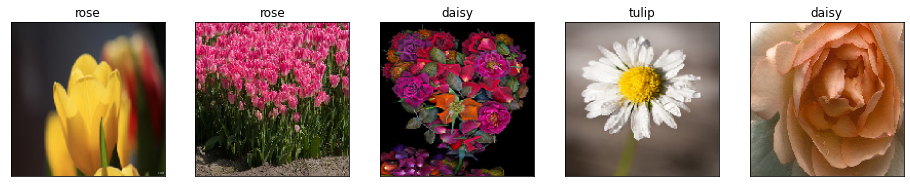

In [11]:
#Let's look at first 5 training data.

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

Spectacular! The flowers are so beautiful :)

### Why we need to [rescal](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) our data ?
> rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor. So all values in X will lie within 0 to 1 !



In [12]:
# Let's resize or rescale training data
X = X.astype('float32')/255
 
# Let's confirm the number of classes :) 
no_of_classes = len(np.unique(y))
no_of_classes

5


> Great! we will predict the flowers of five classes



In [13]:
y

array([4, 4, 2, ..., 1, 2, 3])

 ### Let's converts a class vector (integers) to binary class matrix:
**Arguments:**
- **y**	class vector to be converted into a matrix (integers from 0 to no_of_classes).
- **no_of_classes** total number of classes.
- **dtype**	The data type expected by the input. Default: 'float32'.

**Returns:**
- A binary matrix representation of the input. The classes axis is placed last. [for more...](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/utils/to_categorical)

In [14]:
from keras.utils import np_utils

# let's converts a class vector (integers) to binary class matrix.
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 0., 0., 0., 1.], dtype=float32)

### Split the data into train, test and valid subsets
> Here we are going to split our dataset into **80% train**, **10% validation**, and **10% test**.


In [15]:
from sklearn.model_selection import train_test_split

# let's splite the data into subsets and explore their shapes !

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  866
The training Data Shape  433


In [16]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


> (150, 150, 3) refers to the shape of the data (images) that will be fed into our CNN



### **CNN Implementation**
> This is an image that shows how our CNN architecture looks like :



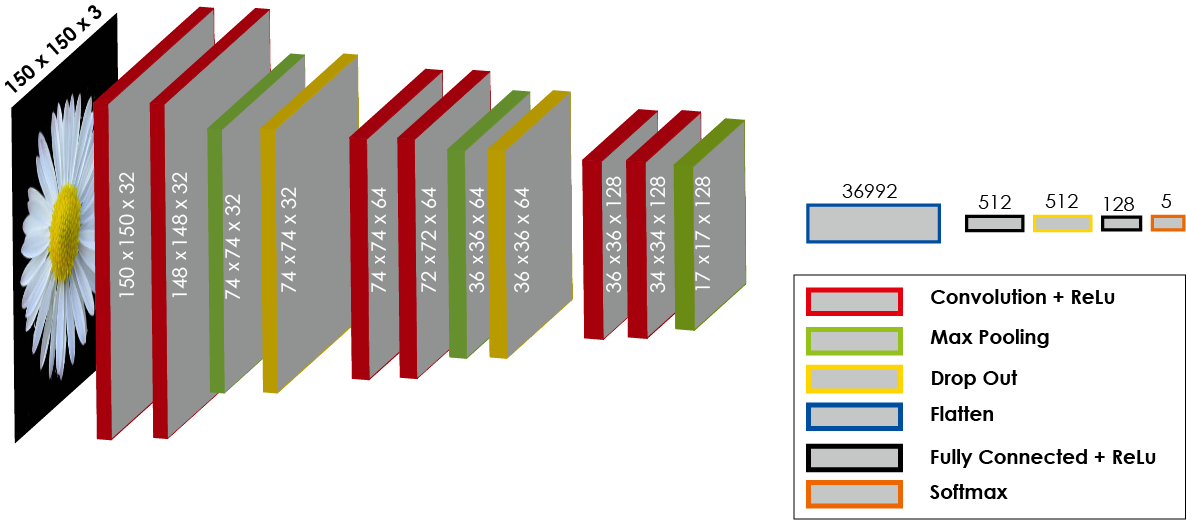

### Import the necessary libraries
> As you can see here, Keras library allows us to import the different functions for building our CNN architecture (Conv2D, MaxPooling2D, Dense, Flatten Dropout.




In [28]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### CNN Architecture
I will be using Sequential method as I am creating a sequential model. **Sequential model means that all the layers of the model will be arranged in sequence**, then i will add:
> * 2 x convolution layer of 32 channel of 3x3 kernal and same padding;
* 1 x maxpool layer of 2x2 pool size;
* 1 x droupt with a frequency of rate equal to 0.25;
* 2 x convolution layer of 64 channel of 3x3 kernal and same padding:
* 1 x maxpool layer of 2x2 pool size 
* 1 x droupt with a frequency of rate equal to 0.25;
* 2 x convolution layer of 128 channel of 3x3 kernal and same padding;
* 1 x maxpool layer of 2x2 pool size;
* 1 x flatten;
* 1 x dense layer of 512
* 1 x dropout set at 0.5
* 1 x dense layer of 128
* 1 x Dense Softmax layer of 5 units

=> **Dropout** is a technique of regularisation which helps us to prevent _**overfitting**_.

If you noticed, I also add **ReLu** (Rectified Linear Unit) activation to each layers so that all the negative values are not passed to the next layer:)


In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

### Model Summary

In [30]:
# Getting the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
Maxpool_1 (MaxPooling2D)     (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
Conv2D_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
Maxpool_2 (MaxPooling2D)     (None, 36, 36, 64)       

### Compiling the model
> I will be using the **RMSprop** optimizer to Maintain a moving (updated) average of the square of the gradients during training, here, in this case, it is fixed at 0.001. If our training bounces a lot off epochs, we need to reduce the learning rate to maintain a moving average.




In [31]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting the model
For callbacks, I employed:


>* **ModelCheckpoint :** Callback to save the model or model weights at certain frequencies (in this case, the model will be saved That only if the validation accuracy of the model at the present time is greater than that at the last time)
* **ReduceLRonPlateau :** Reduce learning rate when a performance metric has stopped improving (in this case, I have set the patience at 3, which means that the model will reduce the learning rate if it does not see any increase in the validation precision in 3 epochs)

   I am using **model.fit_generator** because I am using **ImageDataGenerator** to pass data to the model. I will pass the train and valid data to **fit_generator**. In **fit_generator**, **steps_per_epoch** will set the **batch_size** to pass training data to the model and **validation_steps** will do the same for validation data. These settings could be changed according to each system specifications.



In [32]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
 
# Time to train our model !
epochs = 100
batch_size=32
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath = "/gdrive/My Drive/PId_Best.h5", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
# let's get started !
 
history=model.fit_generator(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            #validation_steps=len(X_valid) //batch_size,
                            callbacks=[checkpointer, learning_rate_reduction])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/100
108/108 [==============================] - ETA: 0s - loss: 1.5838 - accuracy: 0.3166
Epoch 00001: val_loss improved from inf to 1.49932, saving model to /gdrive/My Drive/PId_Best.h5
108/108 [==============================] - 19s 173ms/step - loss: 1.5838 - accuracy: 0.3166 - val_loss: 1.4993 - val_accuracy: 0.3418
Epoch 2/100
108/108 [==============================] - ETA: 0s - loss: 1.2961 - accuracy: 0.4417
Epoch 00002: val_loss improved from 1.49932 to 1.25631, saving model to /gdrive/My Drive/PId_Best.h5
108/108 [==============================] - 19s 175ms/step - loss: 1.2961 - accuracy: 0.4417 - val_loss: 1.2563 - val_accuracy: 0.4734
Epoch 3/100
108/108 [==============================] - ETA: 0s - loss: 1.1966 - accuracy: 0.5111
Epoch 00003: val_loss improved from 1.25631 to 1.16809, saving model to /gdrive/My Drive/PId_Best.h5
108/108 [==============================] - 19s 174ms/step - loss: 1.1966 - accuracy: 0.5111 - val_loss: 1.1681 - val_accuracy: 0.5127
Epoch 4/

### Model Evaluation

In [33]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=batch_size, verbose=2)
 
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

14/14 - 0s - loss: 0.5054 - accuracy: 0.8430
Accuracy: 84.30%
Loss: 0.5054073333740234


### Acuuracy and Loss graphs

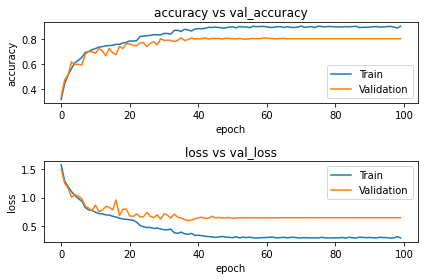

In [34]:
# Let's visualize the train/validation loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(1)
    #plt.figure(figsize=(10,10)) 
 
     # summarize history for accuracy  
 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
 
     # summarize history for loss  
 
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
# Finaly, let's call the plot function with the 'result' parameter 
 
plot(history)

#### **Few take aways**
> * From the Training and Validation Accuracy graph above, our model does not seem to be overfitted, which is great!
* Also, Our Training and Validation Loss graph above also indicates a good learning rate.



### Prediction
> Finally, let us test our model against more random samples from the test data !



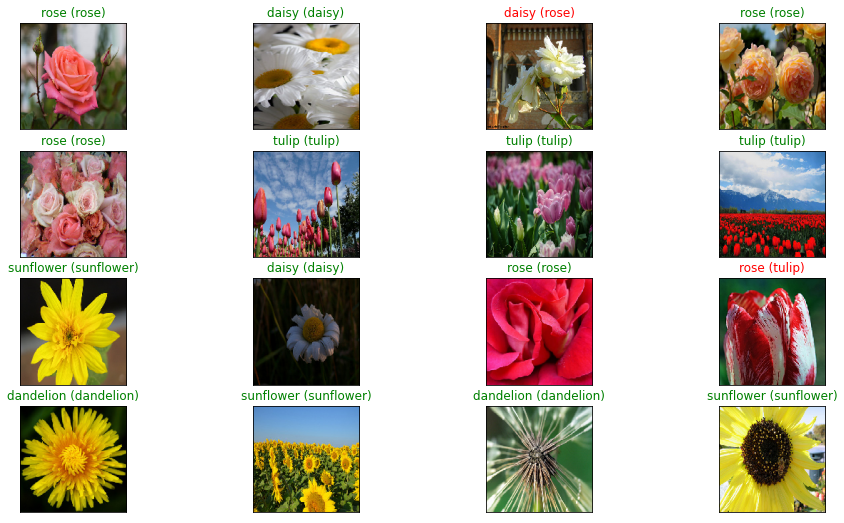

In [45]:
# Let's visualize some random test prediction.
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

### Confusion matrix
I will plotting confusion matrix according to test datas. **0,1,2,3,4** values in this matrix means **daisies, dandelions, roses, sunflowers, tulips** respectively

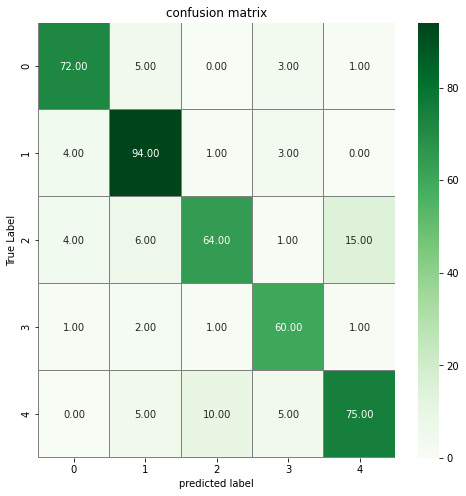

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

### **Few Take aways:**
- The most difficult to detect the type of flower is **tulip**.
- The easiest to detect the type of flower is **daisy**.
- Our confusion matrix indicates that a lot of prediction errors came from distinguishing between **rose** and **tulip**.

### Loading the model
> Here we're gonna load our best model trained befor, then make some predictions with it !

In [37]:
my_model=keras.models.load_model('/gdrive/My Drive/PId_Best.h5')

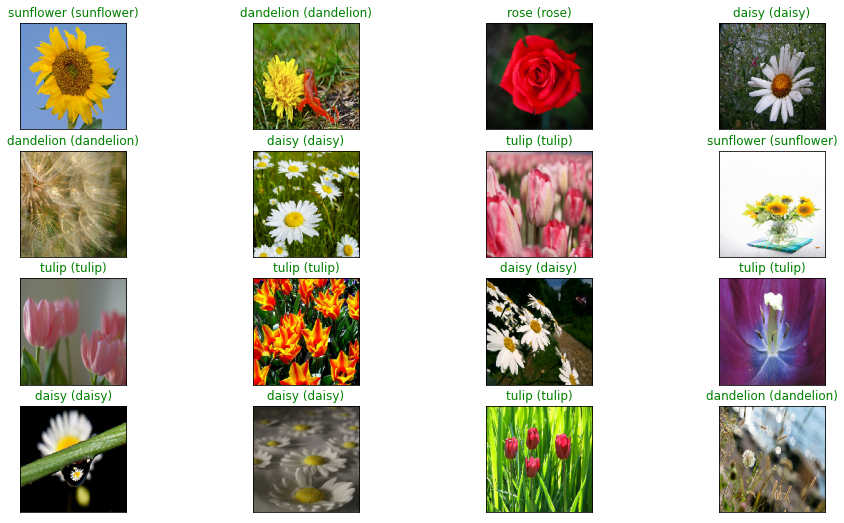

In [38]:
# Let's visualize some random test prediction.
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(my_model.predict(X_test))

## **Conclusion**
The classification precision achieved is great! Considering the quality of data which have been impacted by some issues including :
- Images with noisy backgrounds;
- Multiple plant species appearing in the same image;
- The plant transforms morphologically during its growth... etc.

>This project can be considered quite successful. Of course, there is still much room for improvement. firstly, we can apply the [**Transfer Learning**](https://keras.io/guides/transfer_learning/) principe with advanced and popular architectures as VGG16 or ResNet-50 and train it from fine-tuned from pre-trained weights on the popular **ImageNet** dataset.


**Author : ZEKAOUI Nour Eddine** 

*   My [LinkedIn](https://www.linkedin.com/in/nour-eddine-zekaoui-ba43b1177/)
*   My [GitHub](https://github.com/zekaouinoureddine)



## **Thank you a lot for your interest** ☻